In [2]:
import pandas as pd

df = pd.read_csv('../tesla_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [4]:
df['Model'].value_counts()

Model
Model S       528
Model X       528
Model 3       528
Model Y       528
Cybertruck    528
Name: count, dtype: int64

In [9]:
model_3 = df.query('Model == "Model 3"')

In [12]:
model_3.head(5)

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
6,2015,11,Asia,Model 3,7717,7976,87588.21,82,475,549.84,Interpolated (Month),9961
10,2020,11,Asia,Model 3,8319,9154,117946.76,120,670,836.06,Estimated (Region),10165
19,2021,1,Asia,Model 3,7808,8183,102109.35,60,359,420.46,Interpolated (Month),8256
20,2019,5,Middle East,Model 3,13977,14319,57301.92,75,417,874.26,Official (Quarter),13525


In [11]:
model_3.sort_values(by=['Year', 'Month'], ascending=True)

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
1423,2015,1,Europe,Model 3,7597,8376,80810.67,75,417,475.19,Interpolated (Month),8942
2215,2015,1,Asia,Model 3,8795,9165,87988.73,82,456,601.58,Official (Quarter),12626
2354,2015,1,Middle East,Model 3,11446,12752,89289.40,100,588,1009.54,Estimated (Region),8925
2469,2015,1,North America,Model 3,9446,9528,110632.33,75,435,616.35,Estimated (Region),11496
1353,2015,2,Europe,Model 3,2324,2423,52582.09,120,696,242.63,Interpolated (Month),9032
...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2025,11,Middle East,Model 3,4645,4827,65577.08,82,480,334.44,Interpolated (Month),4017
101,2025,12,Europe,Model 3,16501,18884,108207.45,100,573,1418.26,Interpolated (Month),11849
637,2025,12,Asia,Model 3,8406,8796,70798.20,82,463,583.80,Official (Quarter),13617
978,2025,12,North America,Model 3,12098,12627,58627.89,120,708,1284.81,Official (Quarter),3110


In [21]:
model_3['Date'] = pd.to_datetime(model_3[['Year', 'Month']].assign(DAY=1))
model_3 = model_3.set_index('Date')
model_3 = model_3.sort_index(ascending=True)

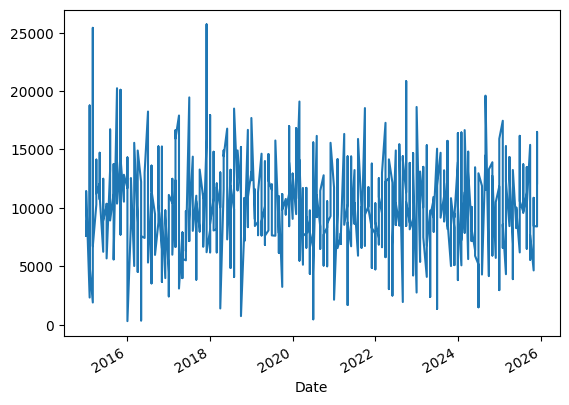

In [22]:
import matplotlib.pyplot as plt

model_3['Estimated_Deliveries'].plot()
plt.show()

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

series = model_3['Estimated_Deliveries']
model = SimpleExpSmoothing(series).fit(smoothing_level=0.4, optimized=False)

forecast = model.forecast(12)
print(forecast)

528    12218.508702
529    12218.508702
530    12218.508702
531    12218.508702
532    12218.508702
533    12218.508702
534    12218.508702
535    12218.508702
536    12218.508702
537    12218.508702
538    12218.508702
539    12218.508702
dtype: float64


c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


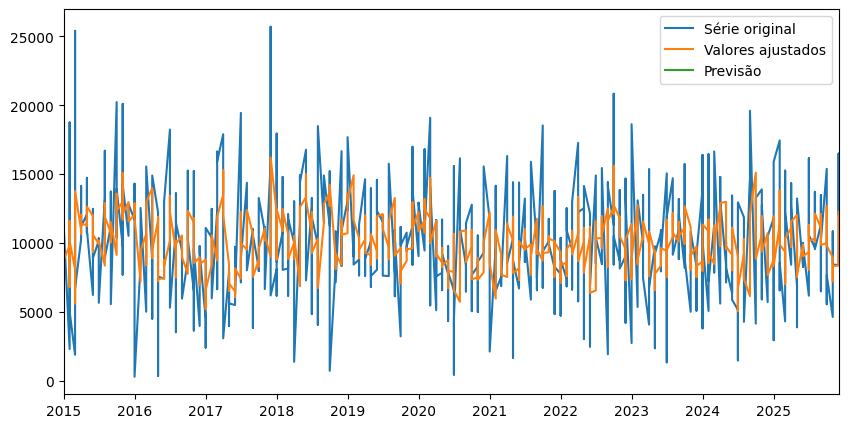

In [30]:
plt.figure(figsize=(10,5))
plt.plot(series, label='Série original')
plt.plot(model.fittedvalues, label='Valores ajustados')
plt.plot(forecast, label='Previsão')
plt.legend()
plt.xlim(series.index.min(), series.index.max())
plt.show()